In [1]:
# 실습용 데이터 패키지
from sklearn.datasets import load_breast_cancer

# 데이터 전처리 패키지
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 구축 및 평가 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [3]:
data = pd.read_csv('loan_data.csv')
data

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0.60,80,400,0,120,0,M,D,D,1
43382,50,0,0,0,0,1,0,3400,0,0,...,1.61,70,0,0,70,0,F,D,D,1
43383,45,42,42,0,42,0,0,6300,0,0,...,0.95,70,0,0,70,0,M,D,D,1
43384,35,0,0,0,0,1,0,4000,0,0,...,0.51,80,400,0,190,0,F,D,D,1


In [13]:
data=pd.get_dummies(data, columns=['SEX', 'PAY_METHOD', 'JOB'])

In [14]:
data

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,...,0,1,1,0,0,0,1,0,0,0
1,35,9,9,0,0,1,0,3700,0,9,...,0,1,0,0,1,0,0,1,0,0
2,55,9,9,0,0,0,0,6400,0,1,...,0,1,0,0,1,0,0,1,0,0
3,55,42,0,42,0,5,0,8900,0,13,...,0,1,0,1,0,0,0,0,1,0
4,40,36,36,36,0,3,1,0,0,2,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0,1,0,0,0,1,0,0,0,1
43382,50,0,0,0,0,1,0,3400,0,0,...,1,0,0,0,0,1,0,0,0,1
43383,45,42,42,0,42,0,0,6300,0,0,...,0,1,0,0,0,1,0,0,0,1
43384,35,0,0,0,0,1,0,4000,0,0,...,1,0,0,0,0,1,0,0,0,1


In [22]:
# SEX_F, PAY_METHOD_D, JOB_D 기준. 이 칼럼들 삭제
data=data.drop(['SEX_F', 'PAY_METHOD_D', 'JOB_D'], axis=1)

C:\Users\sangmin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sangmin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

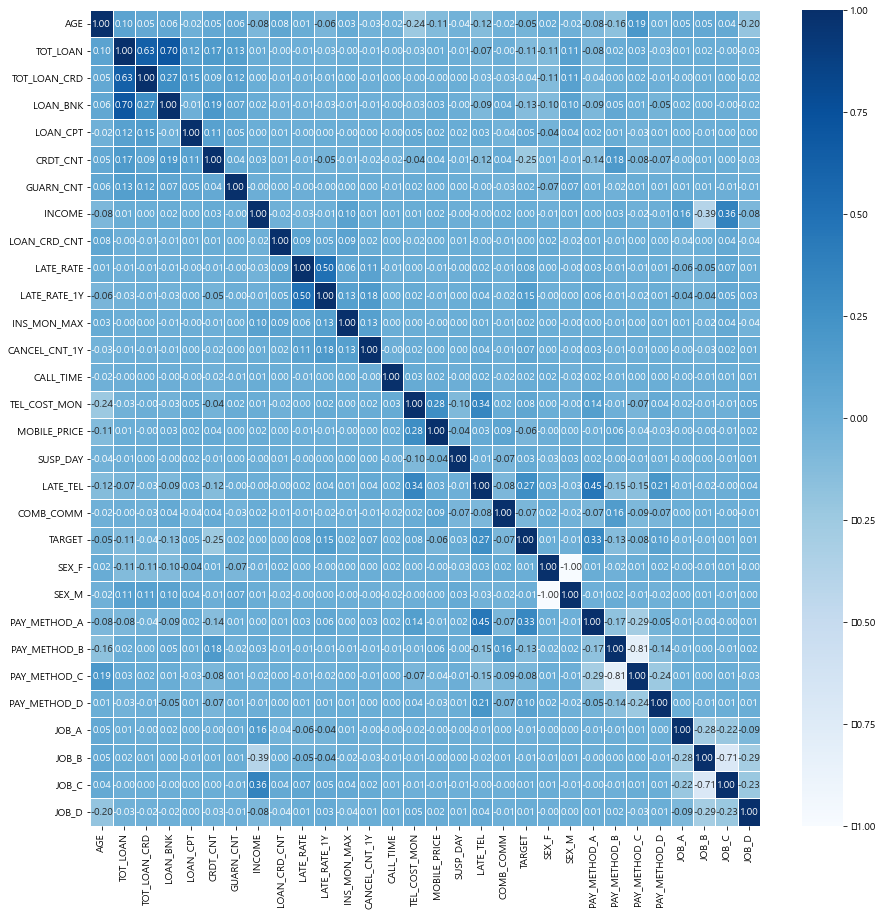

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [23]:
X=data.drop(['TARGET'], axis=1)
y=data['TARGET']

In [24]:
X

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SUSP_DAY,LATE_TEL,COMB_COMM,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,JOB_A,JOB_B,JOB_C
0,40,6,6,6,0,0,0,4500,0,16,...,0,120,0,1,1,0,0,1,0,0
1,35,9,9,0,0,1,0,3700,0,9,...,0,0,0,1,0,0,1,0,1,0
2,55,9,9,0,0,0,0,6400,0,1,...,0,0,0,1,0,0,1,0,1,0
3,55,42,0,42,0,5,0,8900,0,13,...,0,0,0,1,0,1,0,0,0,1
4,40,36,36,36,0,3,1,0,0,2,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0,120,0,1,0,0,0,0,0,0
43382,50,0,0,0,0,1,0,3400,0,0,...,0,70,0,0,0,0,0,0,0,0
43383,45,42,42,0,42,0,0,6300,0,0,...,0,70,0,1,0,0,0,0,0,0
43384,35,0,0,0,0,1,0,4000,0,0,...,0,190,0,0,0,0,0,0,0,0


In [25]:
y

0        0
1        0
2        0
3        0
4        0
        ..
43381    1
43382    1
43383    1
43384    1
43385    1
Name: TARGET, Length: 43386, dtype: int64

In [28]:
X_columns=X.columns

In [26]:
# Train set/ Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=2021)
# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [27]:
# model 불러오기
model = LogisticRegression()

# model 학습시키기
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# 데이터 컬럼에 따른 beta, exp(beta) 체크
column_name = ["const"] + X_columns.tolist()
beta = np.concatenate([model.intercept_,model.coef_.reshape(-1)]).round(2) # round(2) 소수점 둘째짜리까지 반올림
odds = np.exp(beta).round(2) # round(2) 소수점 둘째짜리까지 반올림
interpret = np.where(beta>0,'arrear','no') # np.where() 조건문 

# beta 해석 정리
beta_analysis = pd.DataFrame(np.c_[beta,odds,interpret],index=column_name,columns=['beta','exp(beta)','interpret'])
beta_analysis

,beta,exp(beta),interpret
const,-3.17,0.04,no
AGE,-0.02,0.98,no
TOT_LOAN,-0.25,0.78,no
TOT_LOAN_CRD,0.1,1.11,arrear
LOAN_BNK,-0.83,0.44,no
LOAN_CPT,0.21,1.23,arrear
CRDT_CNT,-0.89,0.41,no
GUARN_CNT,0.13,1.14,arrear
INCOME,0.09,1.09,arrear
LOAN_CRD_CNT,-0.05,0.95,no


In [32]:
# X_test에 대한 P(Y=0) 예측 확률값과 P(Y=1) 예측 확률값 - 패키지 이용
model.predict_proba(X_test)

array([[0.95453621, 0.04546379],
       [0.97173605, 0.02826395],
       [0.99204643, 0.00795357],
       ...,
       [0.92722581, 0.07277419],
       [0.98119566, 0.01880434],
       [0.93405779, 0.06594221]])

In [33]:
# X_test에 대한 P(Y=0) 예측 확률값과 P(Y=1) 예측 확률값 - 직접 계산

## beta 곱하기 X 계산
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]),X_test],beta.reshape(-1,1))
## P(Y=1) 계산
P_1 = 1 / (1+np.exp(-Xbeta))

## 패키지와 직접 계산 결과 비교
pd.DataFrame(np.concatenate([P_1,model.predict_proba(X_test)[:,1].reshape(-1,1)],axis=1),columns=['직접','패키지'])

,직접,패키지
0,0.045249,0.045464
1,0.028467,0.028264
2,0.008016,0.007954
3,0.010786,0.010960
4,0.099047,0.098108
...,...,...
13011,0.064811,0.063493
13012,0.303962,0.298747
13013,0.073402,0.072774
13014,0.018873,0.018804


In [36]:
Cut_off = np.linspace(0.0000001,0.99,11) ## cut off 값 여러개 만들어두기
for cutoff in Cut_off:
    y_pred = np.where(P_1.reshape(-1)>=cutoff,1,0) # 확률값이 cuf off보다 크면 1(유방암), 아니면 0(유방암x)
    acc = accuracy_score(y_true = y_test, y_pred =y_pred) ## 정확도
    recall = recall_score(y_true = y_test, y_pred =y_pred) ## 민감도
    precision = precision_score(y_true = y_test, y_pred =y_pred) ## 정밀도
    
    print(f"정확도:{acc:0.2f}",f"민감도:{recall:0.2f}",f"정밀도:{precision:0.2f}",f"cut off:{cutoff:0.2f}", sep='  |  ')  

정확도:0.10  |  민감도:1.00  |  정밀도:0.10  |  cut off:0.00
정확도:0.79  |  민감도:0.78  |  정밀도:0.28  |  cut off:0.10
정확도:0.89  |  민감도:0.53  |  정밀도:0.42  |  cut off:0.20
정확도:0.91  |  민감도:0.40  |  정밀도:0.51  |  cut off:0.30
정확도:0.91  |  민감도:0.33  |  정밀도:0.57  |  cut off:0.40
정확도:0.91  |  민감도:0.25  |  정밀도:0.62  |  cut off:0.50
정확도:0.91  |  민감도:0.17  |  정밀도:0.64  |  cut off:0.59
정확도:0.91  |  민감도:0.11  |  정밀도:0.70  |  cut off:0.69
정확도:0.91  |  민감도:0.05  |  정밀도:0.71  |  cut off:0.79
정확도:0.91  |  민감도:0.02  |  정밀도:0.84  |  cut off:0.89
정확도:0.90  |  민감도:0.00  |  정밀도:1.00  |  cut off:0.99


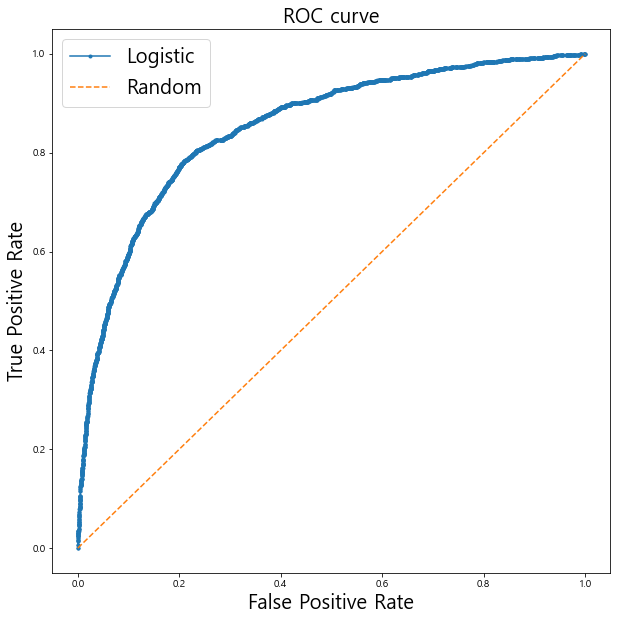

In [37]:
# X_test에 대한 P(Y=1) 예측 확률값 - 패키지 이용
probs = model.predict_proba(X_test)[:, 1] ## [:,1]은 두번째 컬럼을 indexing 한다는 뜻
 
# Roc curve X 축, Y축 추출
model_fpr, model_tpr, threshold1 = roc_curve(y_test, probs)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(X_test.__len__())])

# plot the roc curve for the model and random
plt.figure(figsize=(10,10))
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')

# axis labels
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
 
# show the legend
plt.legend(fontsize=20)
 
# show the plot
plt.title("ROC curve",size=20)
plt.show()